In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings ("ignore")

In [7]:
data=pd.read_csv("Customer-Churn.csv")
data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
# data["SeniorCitizen"]=data["SeniorCitizen"].astype("object")

In [12]:
# data.info()

In [13]:
dp=data.describe()
dp

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


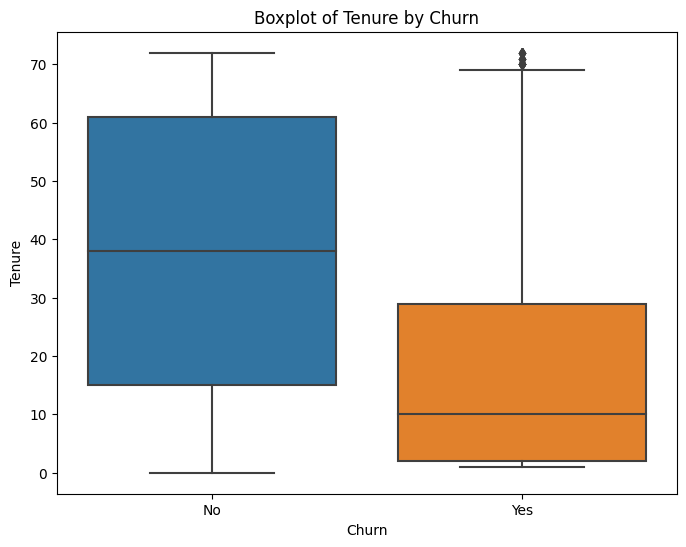

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Boxplot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

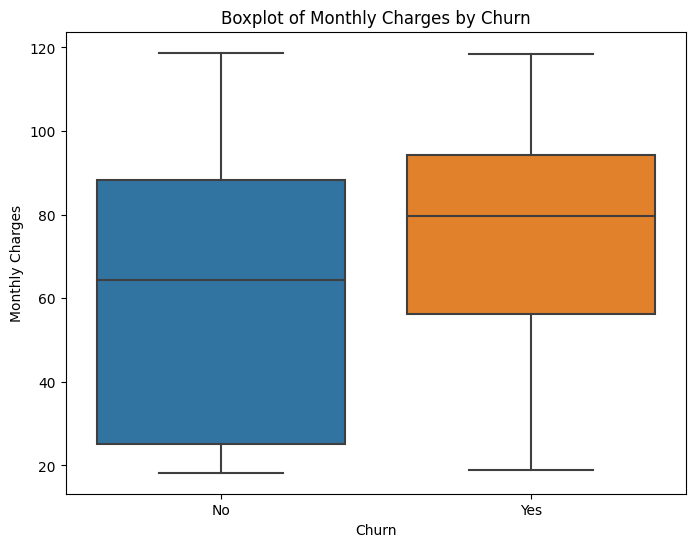

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Boxplot of Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

In [16]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [17]:
# feature selection
df=data.drop("customerID", axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# colum create of calculate charge
df["calculatecharge"]=df["MonthlyCharges"]* df["tenure"]

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,calculatecharge
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1936.30
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40


In [20]:
def hello(x):
    if len(x)<=1:
        return x

In [21]:
# total chareg--> it is object then convert to int/float

df["TotalCharges"].apply(lambda x : hello(x) )

0       None
1       None
2       None
3       None
4       None
        ... 
7038    None
7039    None
7040    None
7041    None
7042    None
Name: TotalCharges, Length: 7043, dtype: object

In [22]:
df["TotalCharges"]=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
# calculate charge check from Total charge
# If Total charge bigger then Calculate chareg then I put Greater, other wise Less
df["calculatecharge"]<df["TotalCharges"]

0       False
1       False
2        True
3       False
4        True
        ...  
7038    False
7039    False
7040     True
7041     True
7042    False
Length: 7043, dtype: bool

In [53]:
df["Total_charges_status"]=np.where(df["calculatecharge"]<df["TotalCharges"],"Biggest","Smallest")

In [54]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,calculatecharge,Total_charges_status
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,Smallest
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30,Smallest
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70,Biggest
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50,Smallest
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40,Biggest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2035.20,Smallest
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.40,Smallest
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60,Biggest
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.60,Biggest


In [57]:
df["Total_charges_status"].value_counts()

Total_charges_status
Smallest    3839
Biggest     3204
Name: count, dtype: int64

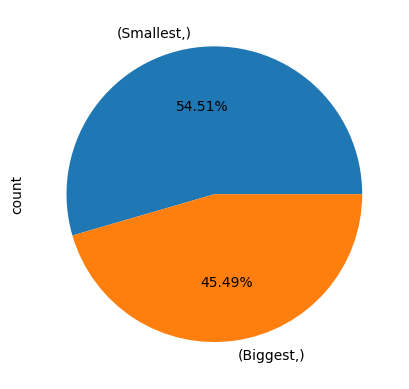

In [58]:
df[["Total_charges_status"]].value_counts().plot(kind ="pie",autopct="%.2f%%")
plt.show()

In [59]:
df.nunique() # in this database nunique value is ( 0 to 4)

gender                     2
SeniorCitizen              2
Partner                    2
Dependents                 2
tenure                    73
PhoneService               2
MultipleLines              3
InternetService            3
OnlineSecurity             3
OnlineBackup               3
DeviceProtection           3
TechSupport                3
StreamingTV                3
StreamingMovies            3
Contract                   3
PaperlessBilling           2
PaymentMethod              4
MonthlyCharges          1585
TotalCharges            6530
Churn                      2
calculatecharge         6051
Total_charges_status       2
dtype: int64

In [60]:
df.nunique().index  # nunique().index() bring column name

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'calculatecharge',
       'Total_charges_status'],
      dtype='object')

In [61]:
fd=df.nunique().reset_index()
colname=fd[fd[0]<=4]["index"]

In [62]:
for i in colname:
    print(i,":",df[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
Total_charges_status : ['Smallest' 'Biggest']


In [63]:
# index change:- not internet service and no phone service convert to "NO"


for j in "MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies ".split():
    df[j].replace("No internet service","No",inplace=True)

In [64]:
df.MultipleLines.replace('No phone service',"No",inplace=True)

In [65]:
for i in colname:
    print(i,":",df[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
Total_charges_status : ['Smallest' 'Biggest']


In [66]:
df.nunique()

gender                     2
SeniorCitizen              2
Partner                    2
Dependents                 2
tenure                    73
PhoneService               2
MultipleLines              2
InternetService            3
OnlineSecurity             2
OnlineBackup               2
DeviceProtection           2
TechSupport                2
StreamingTV                2
StreamingMovies            2
Contract                   3
PaperlessBilling           2
PaymentMethod              4
MonthlyCharges          1585
TotalCharges            6530
Churn                      2
calculatecharge         6051
Total_charges_status       2
dtype: int64

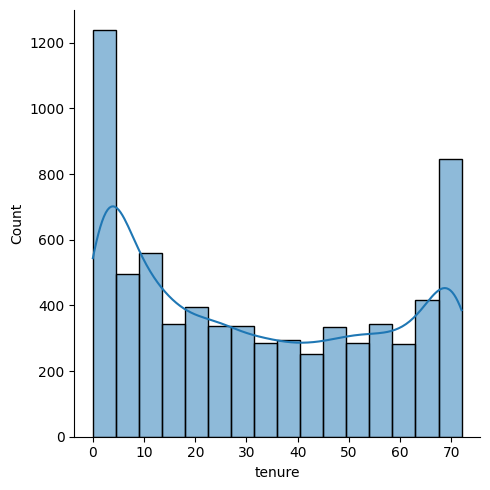

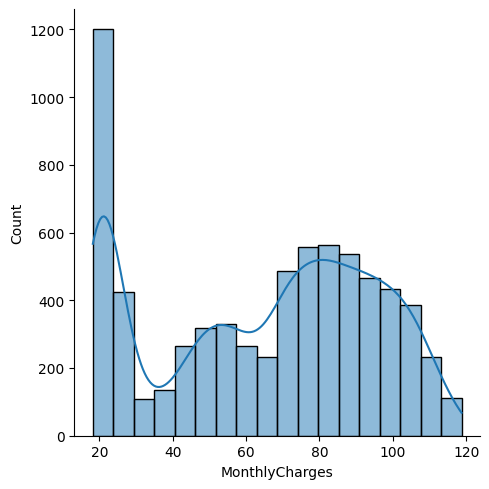

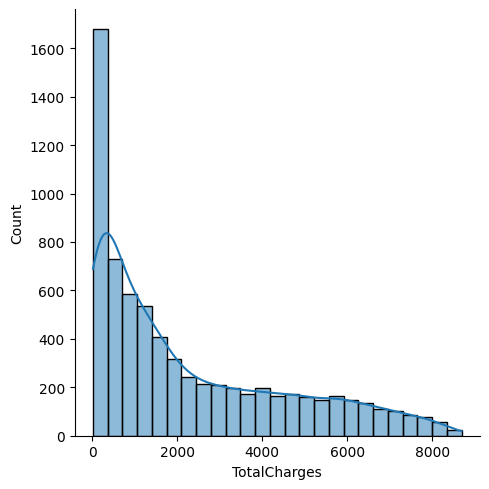

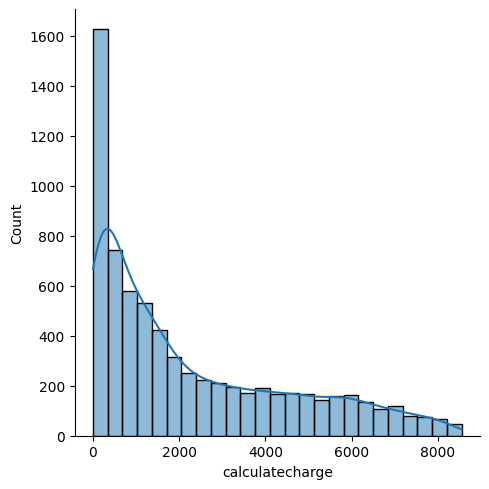

In [67]:
for i in df.columns:
    if df[i].nunique()>4:
        sns.displot(df[i], kde=True)

In [68]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,calculatecharge,Total_charges_status
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85,Smallest
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1936.30,Smallest
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,107.70,Biggest
3,Male,0,No,No,45,No,No,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1903.50,Smallest
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,141.40,Biggest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2035.20,Smallest
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,7430.40,Smallest
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,325.60,Biggest
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,297.60,Biggest


In [69]:
df.drop(["calculatecharge","Total_charges_status"],axis=1, inplace=True)

In [70]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Churn"]=le.fit_transform(df["Churn"])

In [72]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [73]:
dfd=pd.get_dummies(df)


In [74]:
dfd.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,...,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229,-0.005106,0.005106,-0.379697,0.379697,-0.159712,...,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,...,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,...,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,-0.005106,0.014569,-0.000048,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,...,0.010487,0.003386,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744
gender_Male,-0.001874,0.005106,-0.014569,0.000048,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,...,-0.010487,-0.003386,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744
Partner_No,-0.016479,-0.379697,-0.096848,-0.319072,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,...,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125
Partner_Yes,0.016479,0.379697,0.096848,0.319072,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,...,0.117412,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125
Dependents_No,0.211185,-0.159712,0.113890,-0.064653,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,...,0.039741,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071


<Axes: >

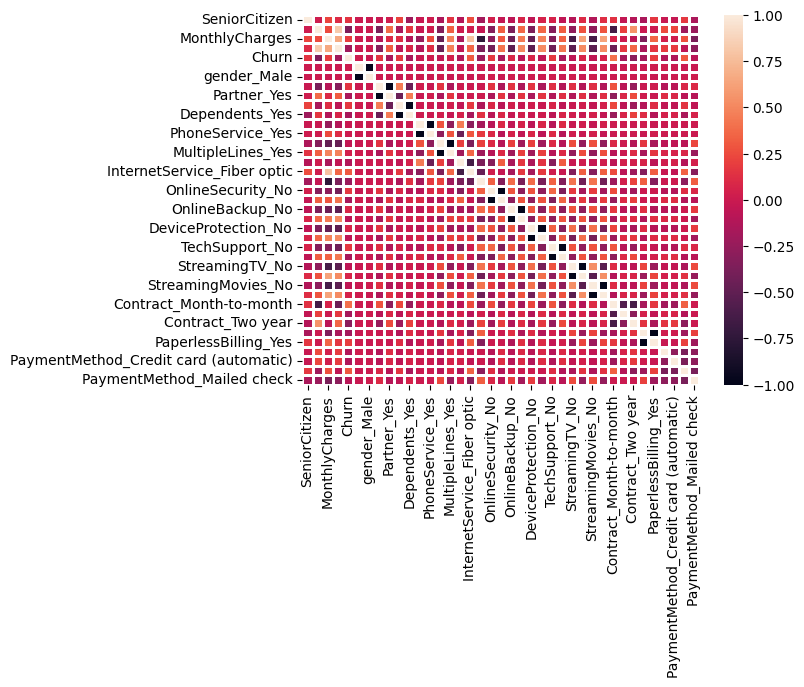

In [75]:
sns.heatmap(dfd.corr(), linewidths=2)


In [124]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [77]:
#  What is the customer churn rate?
df["Churn"].mean()

0.2653698707936959

In [78]:
# How does Gender and Senior Citizen affect Churn rate?
df.groupby('gender')['Churn'].mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: float64

In [79]:
df.groupby('SeniorCitizen')['Churn'].mean()

SeniorCitizen
0    0.236062
1    0.416813
Name: Churn, dtype: float64

In [80]:
churn_rate_with_dependents = df[df['Dependents'] == 'Yes']['Churn'].mean()

# Calculate churn rate for customers without dependents
churn_rate_without_dependents = df[df['Dependents'] == 'No']['Churn'].mean()
print(churn_rate_with_dependents)
print(churn_rate_without_dependents)

0.15450236966824646
0.3127914048246503


<Axes: >

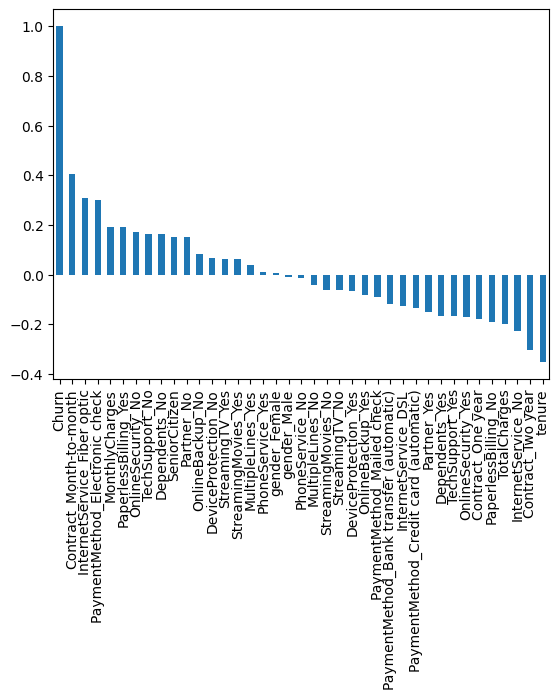

In [81]:
dfd.corr()["Churn"].sort_values(ascending = False).plot(kind = "bar")

In [125]:
# use it on the basis of gender.

df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [83]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [84]:
df[["gender","Churn"]].value_counts()

gender  Churn
Male    0        2625
Female  0        2549
        1         939
Male    1         930
Name: count, dtype: int64

<Axes: xlabel='gender,Churn'>

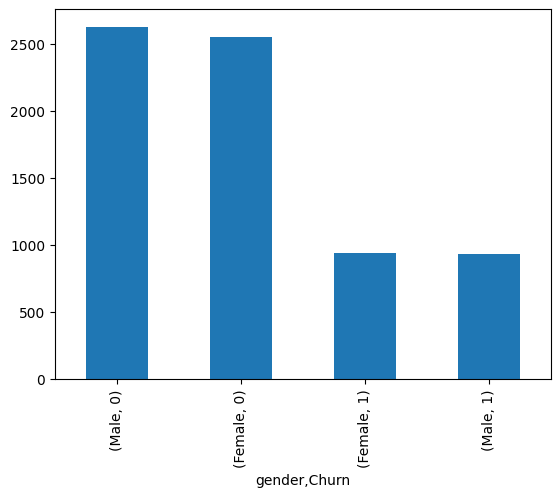

In [85]:
df[["gender","Churn"]].value_counts().plot(kind ="bar")


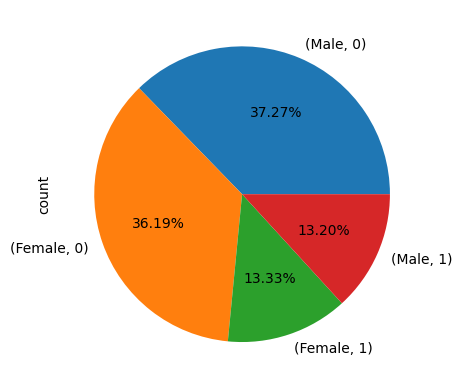

In [86]:
# Paichart Base of Percentage
df[["gender","Churn"]].value_counts().plot(kind ="pie",autopct="%.2f%%")
plt.show()

In [87]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [88]:
df[["SeniorCitizen","gender"]].value_counts()

SeniorCitizen  gender
0              Male      2981
               Female    2920
1              Male       574
               Female     568
Name: count, dtype: int64

<Axes: xlabel='SeniorCitizen,gender,Churn'>

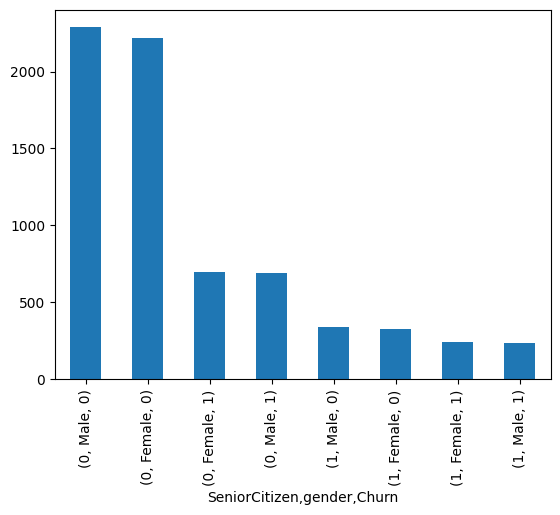

In [89]:
df[["SeniorCitizen","gender","Churn"]].value_counts().plot(kind="bar")



<Axes: ylabel='count'>

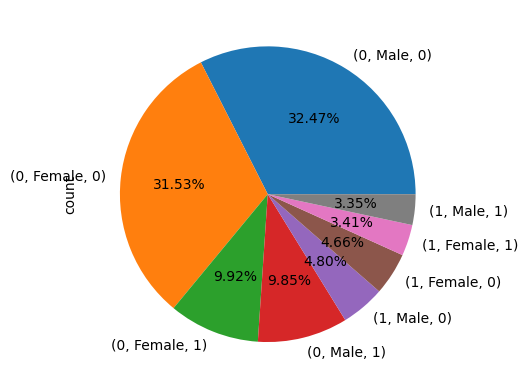

In [90]:
df[["SeniorCitizen","gender","Churn"]].value_counts().plot(kind="pie",autopct="%.2f%%")


In [91]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [92]:
df[df["Churn"]==0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [93]:
df[df["Churn"]==0]["MonthlyCharges"]

0        29.85
1        56.95
3        42.30
6        89.10
7        29.75
         ...  
7037     21.15
7038     84.80
7039    103.20
7040     29.60
7042    105.65
Name: MonthlyCharges, Length: 5174, dtype: float64

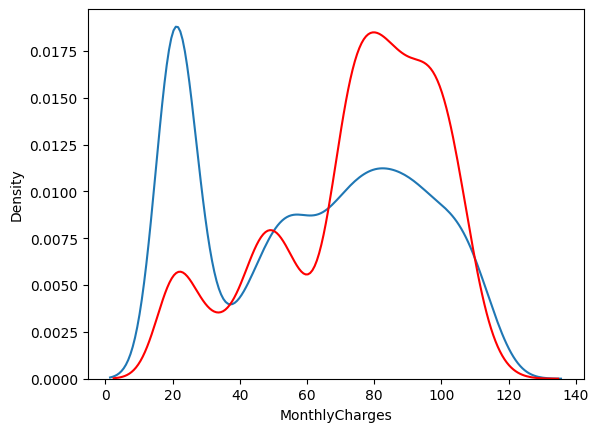

In [94]:
sns.kdeplot(x=df[df["Churn"]==0]["MonthlyCharges"])
sns.kdeplot(x=df[df["Churn"]==1]["MonthlyCharges"], color="r")
plt.show()

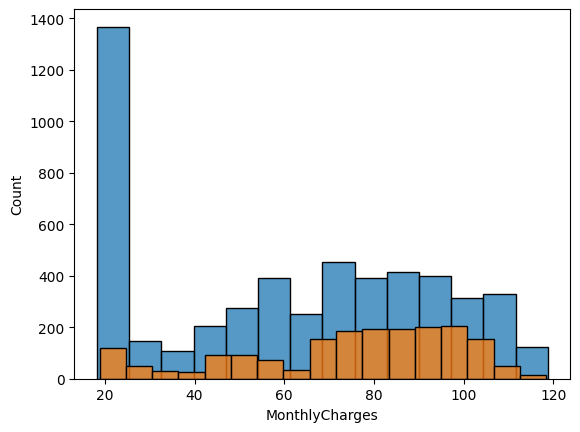

In [95]:
sns.histplot(x=df[df["Churn"]==0]["MonthlyCharges"])
sns.histplot(x=df[df["Churn"]==1]["MonthlyCharges"])
plt.show()

In [96]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


# Internet Services

In [97]:
df[["InternetService","Churn"]].value_counts()

InternetService  Churn
DSL              0        1962
Fiber optic      0        1799
No               0        1413
Fiber optic      1        1297
DSL              1         459
No               1         113
Name: count, dtype: int64

In [98]:
df[df["Churn"]==0]["InternetService"]
df[df["Churn"]==1]["InternetService"]
print(a,b)

NameError: name 'a' is not defined

<Axes: ylabel='count'>

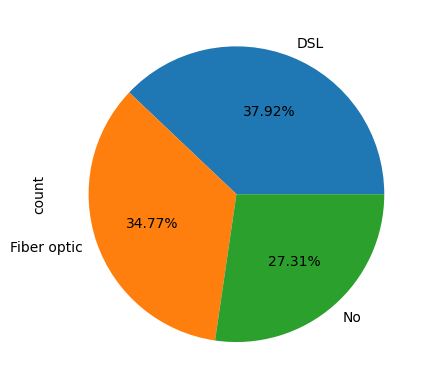

In [99]:
df[df["Churn"]==0]["InternetService"].value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

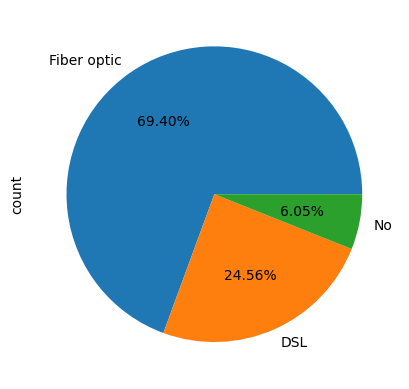

In [100]:
df[df["Churn"]==1]["InternetService"].value_counts().plot(kind="pie",autopct="%.2f%%",)

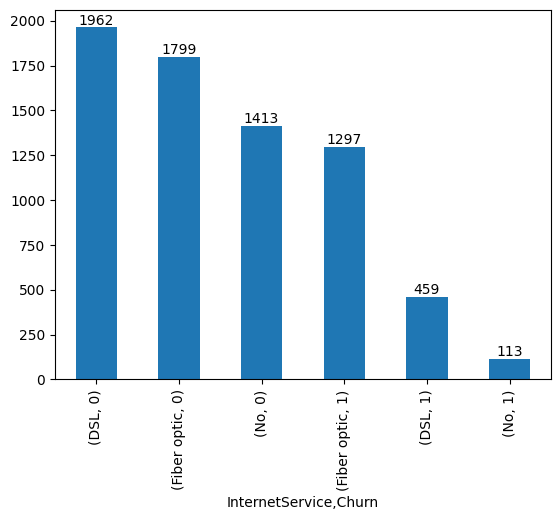

In [101]:
graph=df[["InternetService","Churn"]].value_counts().plot(kind="bar")
for i in graph.containers:
    graph.bar_label(i)

# Payment Method

In [102]:
df[["PaymentMethod","Churn"]].value_counts()

PaymentMethod              Churn
Mailed check               0        1304
Electronic check           0        1294
Credit card (automatic)    0        1290
Bank transfer (automatic)  0        1286
Electronic check           1        1071
Mailed check               1         308
Bank transfer (automatic)  1         258
Credit card (automatic)    1         232
Name: count, dtype: int64

In [103]:
a=df[df["Churn"]==0]["PaymentMethod"]
b=df[df["Churn"]==1]["PaymentMethod"]
print(a,b)

0                Electronic check
1                    Mailed check
3       Bank transfer (automatic)
6         Credit card (automatic)
7                    Mailed check
                  ...            
7037    Bank transfer (automatic)
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 5174, dtype: object 2                    Mailed check
4                Electronic check
5                Electronic check
8                Electronic check
13      Bank transfer (automatic)
                  ...            
7021             Electronic check
7026    Bank transfer (automatic)
7032             Electronic check
7034      Credit card (automatic)
7041                 Mailed check
Name: PaymentMethod, Length: 1869, dtype: object


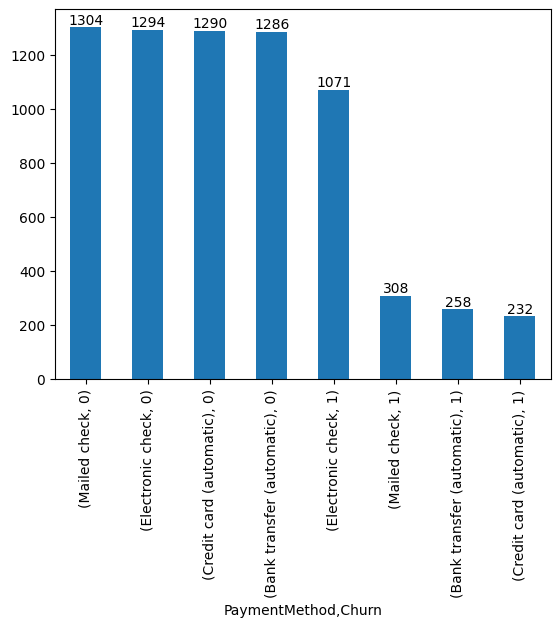

In [104]:
graph=df[["PaymentMethod","Churn"]].value_counts().plot(kind="bar")
for i in graph.containers:
    graph.bar_label(i)

<Axes: ylabel='count'>

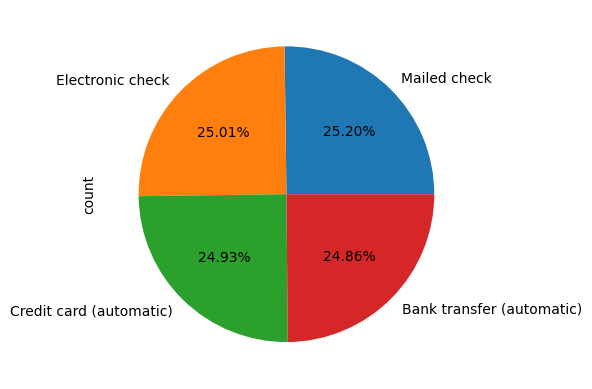

In [105]:
df[df["Churn"]==0]["PaymentMethod"].value_counts().plot(kind="pie",autopct="%.2f%%")


<Axes: ylabel='count'>

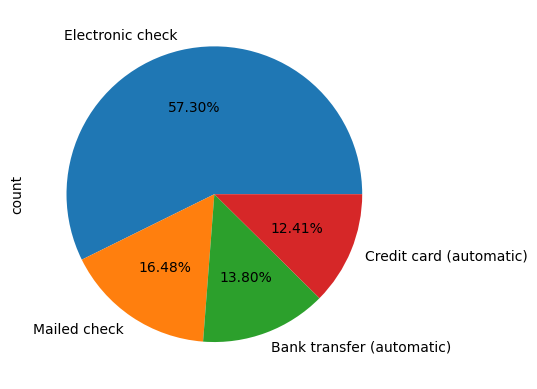

In [106]:
df[df["Churn"]==1]["PaymentMethod"].value_counts().plot(kind="pie",autopct="%.2f%%")


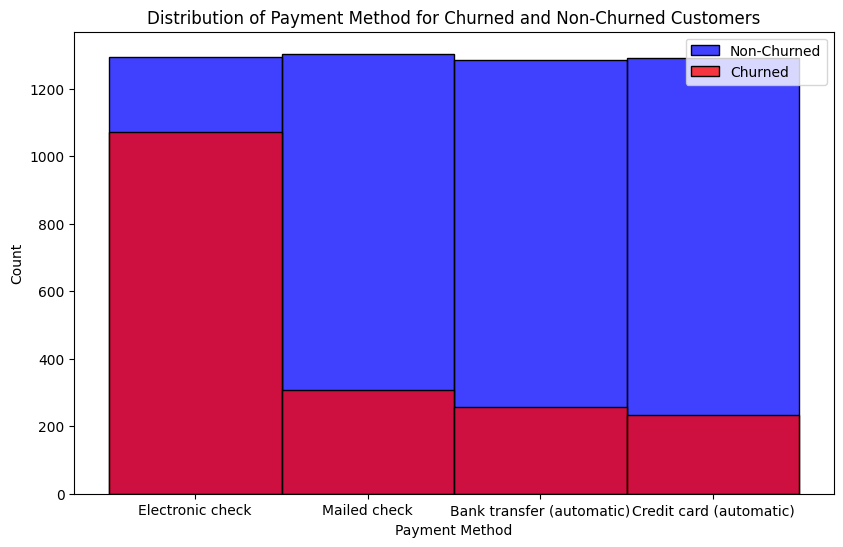

In [123]:
plt.figure(figsize=(9.8, 6))

sns.histplot(x=df[df["Churn"]==0]["PaymentMethod"], color="blue", label="Non-Churned")
sns.histplot(x=df[df["Churn"]==1]["PaymentMethod"], color="red", label="Churned")
plt.legend()
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Distribution of Payment Method for Churned and Non-Churned Customers')
plt.show()